## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [9]:
"""
Compile 模型
"""
from keras import optimizers
optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["binary_accuracy"], optimizer=optimizer)

In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0374 - binary_accuracy: 0.9974 - val_loss: 5.0452 - val_binary_accuracy: 0.9070
Epoch 2/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0281 - binary_accuracy: 0.9980 - val_loss: 5.1551 - val_binary_accuracy: 0.9088
Epoch 3/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0312 - binary_accuracy: 0.9979 - val_loss: 5.1131 - val_binary_accuracy: 0.9073
Epoch 4/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0527 - binary_accuracy: 0.9965 - val_loss: 5.2296 - val_binary_accuracy: 0.9069
Epoch 5/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0757 - binary_accuracy: 0.9950 - val_loss: 5.0125 - val_binary_accuracy: 0.9066
Epoch 6/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0622 - binary_accuracy: 0.9958 - val_loss: 4.9526 - val_bi

50000/50000 [==============================] - 2s 41us/step - loss: 0.0453 - binary_accuracy: 0.9969 - val_loss: 5.3628 - val_binary_accuracy: 0.9086
Epoch 52/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0228 - binary_accuracy: 0.9985 - val_loss: 5.4657 - val_binary_accuracy: 0.9070
Epoch 53/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0219 - binary_accuracy: 0.9985 - val_loss: 5.4979 - val_binary_accuracy: 0.9067
Epoch 54/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0586 - binary_accuracy: 0.9961 - val_loss: 5.2144 - val_binary_accuracy: 0.9053
Epoch 55/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0454 - binary_accuracy: 0.9969 - val_loss: 5.3349 - val_binary_accuracy: 0.9064
Epoch 56/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0331 - binary_accuracy: 0.9978 - val_loss: 5.3002 - val_binary_accuracy: 0.9067
Epoch 57/500
50000/50000 [=========

50000/50000 [==============================] - 2s 40us/step - loss: 0.0040 - binary_accuracy: 0.9998 - val_loss: 6.1260 - val_binary_accuracy: 0.9093
Epoch 102/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 6.0858 - val_binary_accuracy: 0.9100
Epoch 103/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.2687e-04 - binary_accuracy: 1.0000 - val_loss: 6.1153 - val_binary_accuracy: 0.9101
Epoch 104/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4329e-04 - binary_accuracy: 1.0000 - val_loss: 6.1557 - val_binary_accuracy: 0.9100
Epoch 105/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1081e-04 - binary_accuracy: 1.0000 - val_loss: 6.1580 - val_binary_accuracy: 0.9101
Epoch 106/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0056e-04 - binary_accuracy: 1.0000 - val_loss: 6.1845 - val_binary_accuracy: 0.9101
Epoch 107/500


Epoch 150/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.5749e-05 - binary_accuracy: 1.0000 - val_loss: 6.5639 - val_binary_accuracy: 0.9106
Epoch 151/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.5418e-05 - binary_accuracy: 1.0000 - val_loss: 6.5689 - val_binary_accuracy: 0.9106
Epoch 152/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.5053e-05 - binary_accuracy: 1.0000 - val_loss: 6.5731 - val_binary_accuracy: 0.9106
Epoch 153/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.4800e-05 - binary_accuracy: 1.0000 - val_loss: 6.5786 - val_binary_accuracy: 0.9106
Epoch 154/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.4507e-05 - binary_accuracy: 1.0000 - val_loss: 6.5841 - val_binary_accuracy: 0.9106
Epoch 155/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.4177e-05 - binary_accuracy: 1.0000 - val_loss: 6.5874 - val_binary_accuracy:

Epoch 199/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6403e-05 - binary_accuracy: 1.0000 - val_loss: 6.7523 - val_binary_accuracy: 0.9105
Epoch 200/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.6267e-05 - binary_accuracy: 1.0000 - val_loss: 6.7549 - val_binary_accuracy: 0.9105
Epoch 201/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6161e-05 - binary_accuracy: 1.0000 - val_loss: 6.7574 - val_binary_accuracy: 0.9105
Epoch 202/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6026e-05 - binary_accuracy: 1.0000 - val_loss: 6.7603 - val_binary_accuracy: 0.9105
Epoch 203/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5904e-05 - binary_accuracy: 1.0000 - val_loss: 6.7634 - val_binary_accuracy: 0.9105
Epoch 204/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5805e-05 - binary_accuracy: 1.0000 - val_loss: 6.7668 - val_binary_accuracy:

Epoch 248/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2221e-05 - binary_accuracy: 1.0000 - val_loss: 6.8784 - val_binary_accuracy: 0.9105
Epoch 249/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2169e-05 - binary_accuracy: 1.0000 - val_loss: 6.8808 - val_binary_accuracy: 0.9105
Epoch 250/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2105e-05 - binary_accuracy: 1.0000 - val_loss: 6.8825 - val_binary_accuracy: 0.9105
Epoch 251/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2046e-05 - binary_accuracy: 1.0000 - val_loss: 6.8845 - val_binary_accuracy: 0.9105
Epoch 252/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1985e-05 - binary_accuracy: 1.0000 - val_loss: 6.8868 - val_binary_accuracy: 0.9105
Epoch 253/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1923e-05 - binary_accuracy: 1.0000 - val_loss: 6.8892 - val_binary_accuracy:

Epoch 297/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.8211e-06 - binary_accuracy: 1.0000 - val_loss: 6.9740 - val_binary_accuracy: 0.9107
Epoch 298/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.7906e-06 - binary_accuracy: 1.0000 - val_loss: 6.9753 - val_binary_accuracy: 0.9106
Epoch 299/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.7370e-06 - binary_accuracy: 1.0000 - val_loss: 6.9773 - val_binary_accuracy: 0.9106
Epoch 300/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.7021e-06 - binary_accuracy: 1.0000 - val_loss: 6.9789 - val_binary_accuracy: 0.9106
Epoch 301/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.6801e-06 - binary_accuracy: 1.0000 - val_loss: 6.9808 - val_binary_accuracy: 0.9106
Epoch 302/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.6280e-06 - binary_accuracy: 1.0000 - val_loss: 6.9827 - val_binary_accuracy:

Epoch 346/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.2468e-06 - binary_accuracy: 1.0000 - val_loss: 7.0520 - val_binary_accuracy: 0.9107
Epoch 347/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.2229e-06 - binary_accuracy: 1.0000 - val_loss: 7.0532 - val_binary_accuracy: 0.9107
Epoch 348/500
50000/50000 [==============================] - 2s 40us/step - loss: 8.1936e-06 - binary_accuracy: 1.0000 - val_loss: 7.0547 - val_binary_accuracy: 0.9107
Epoch 349/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.1690e-06 - binary_accuracy: 1.0000 - val_loss: 7.0560 - val_binary_accuracy: 0.9108
Epoch 350/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.1428e-06 - binary_accuracy: 1.0000 - val_loss: 7.0573 - val_binary_accuracy: 0.9108
Epoch 351/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.1228e-06 - binary_accuracy: 1.0000 - val_loss: 7.0591 - val_binary_accuracy:

Epoch 395/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.1325e-06 - binary_accuracy: 1.0000 - val_loss: 7.1169 - val_binary_accuracy: 0.9108
Epoch 396/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.1096e-06 - binary_accuracy: 1.0000 - val_loss: 7.1184 - val_binary_accuracy: 0.9108
Epoch 397/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.0935e-06 - binary_accuracy: 1.0000 - val_loss: 7.1195 - val_binary_accuracy: 0.9108
Epoch 398/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.0735e-06 - binary_accuracy: 1.0000 - val_loss: 7.1208 - val_binary_accuracy: 0.9107
Epoch 399/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.0522e-06 - binary_accuracy: 1.0000 - val_loss: 7.1221 - val_binary_accuracy: 0.9108
Epoch 400/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.0332e-06 - binary_accuracy: 1.0000 - val_loss: 7.1234 - val_binary_accuracy:

Epoch 444/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.2903e-06 - binary_accuracy: 1.0000 - val_loss: 7.1738 - val_binary_accuracy: 0.9108
Epoch 445/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.2733e-06 - binary_accuracy: 1.0000 - val_loss: 7.1750 - val_binary_accuracy: 0.9108
Epoch 446/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.2584e-06 - binary_accuracy: 1.0000 - val_loss: 7.1761 - val_binary_accuracy: 0.9108
Epoch 447/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.2451e-06 - binary_accuracy: 1.0000 - val_loss: 7.1773 - val_binary_accuracy: 0.9108
Epoch 448/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.2279e-06 - binary_accuracy: 1.0000 - val_loss: 7.1784 - val_binary_accuracy: 0.9108
Epoch 449/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.2155e-06 - binary_accuracy: 1.0000 - val_loss: 7.1795 - val_binary_accuracy:

Epoch 493/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.6312e-06 - binary_accuracy: 1.0000 - val_loss: 7.2248 - val_binary_accuracy: 0.9109
Epoch 494/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.6162e-06 - binary_accuracy: 1.0000 - val_loss: 7.2256 - val_binary_accuracy: 0.9108
Epoch 495/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.6069e-06 - binary_accuracy: 1.0000 - val_loss: 7.2266 - val_binary_accuracy: 0.9108
Epoch 496/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.5966e-06 - binary_accuracy: 1.0000 - val_loss: 7.2273 - val_binary_accuracy: 0.9108
Epoch 497/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.5812e-06 - binary_accuracy: 1.0000 - val_loss: 7.2284 - val_binary_accuracy: 0.9108
Epoch 498/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.5737e-06 - binary_accuracy: 1.0000 - val_loss: 7.2295 - val_binary_accuracy:

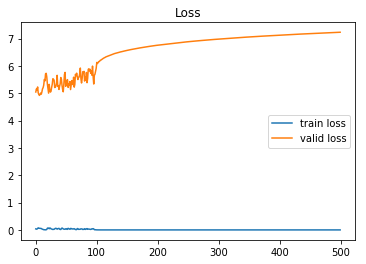

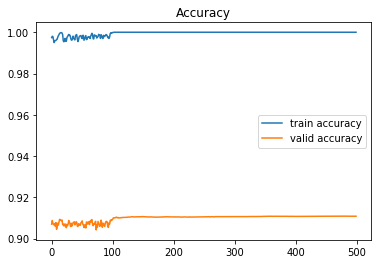

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["binary_accuracy"]
valid_acc = model.history.history["val_binary_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()